In [1]:
import numpy as np
import pandas as pan

import matplotlib.pyplot as plt

import os
from datetime import datetime

In [2]:
df = pan.DataFrame()
chunkList = []
for chunk in pan.read_csv(str(r'..\Datasets\ip-network-traffic-flows-labeled-with-87-apps\Dataset-Unicauca-Version2-87Atts.csv'), chunksize=1000000):
    chunkList.append(chunk)

df = pan.concat(chunkList)

In [3]:
print(df.ProtocolName.unique())

['HTTP_PROXY' 'HTTP' 'HTTP_CONNECT' 'SSL' 'GOOGLE' 'YOUTUBE' 'FACEBOOK'
 'CONTENT_FLASH' 'DROPBOX' 'WINDOWS_UPDATE' 'AMAZON' 'MICROSOFT' 'TOR'
 'GMAIL' 'YAHOO' 'MSN' 'SSL_NO_CERT' 'SKYPE' 'MS_ONE_DRIVE' 'MSSQL'
 'TWITTER' 'APPLE_ICLOUD' 'CLOUDFLARE' 'UBUNTUONE' 'OFFICE_365'
 'WIKIPEDIA' 'OPENSIGNAL' 'DNS' 'HTTP_DOWNLOAD' 'WHATSAPP' 'APPLE_ITUNES'
 'FTP_DATA' 'CITRIX' 'APPLE' 'MQTT' 'INSTAGRAM' 'EBAY' 'GOOGLE_MAPS'
 'IP_ICMP' 'NTP' 'TEAMVIEWER' 'SPOTIFY' 'EASYTAXI' 'MAIL_IMAPS' 'TWITCH'
 'NETFLIX' 'SSH' 'SIMET' 'UNENCRYPED_JABBER' 'WAZE' 'UPNP' 'EDONKEY'
 'OSCAR' 'ORACLE' 'DEEZER' 'OPENVPN' 'WHOIS_DAS' 'SKINNY' 'STARCRAFT'
 'NFS' 'RTMP' 'TEAMSPEAK' 'SNMP' '99TAXI' 'QQ' 'TELEGRAM' 'FTP_CONTROL'
 'LOTUS_NOTES' 'H323' 'CITRIX_ONLINE' 'LASTFM' 'IP_OSPF' 'CNN' 'BGP'
 'RADIUS' nan]


In [4]:
df.Timestamp = pan.to_datetime(df.Timestamp, format='%d/%m/%Y%H:%M:%S')
shrunk_df = df
#df = df.loc[((df.Timestamp.dt.day==26)|(df.Timestamp.dt.day==27)|(df.Timestamp.dt.day==28))&(df.Timestamp.dt.month<5)]
#shrunk_df = shrunk_df.loc[(shrunk_df.Timestamp.dt.day==27)&(shrunk_df.Timestamp.dt.month<5)&(shrunk_df.Timestamp.dt.hour==9)]
shrunk_df = shrunk_df.loc[(shrunk_df.Timestamp.dt.day==27)&(shrunk_df.Timestamp.dt.month<5)]
shrunk_df.sort_values(by='Timestamp', inplace=True)

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [5]:
df_count_Protocol = shrunk_df.groupby(['Timestamp','ProtocolName']).count() #Goup the data by timestep and country

df_requestsPerProtocol = df_count_Protocol['Flow.ID'].unstack().fillna(0) #count all traces per protocol per timestep

df_overallSum = df_requestsPerProtocol.sum() #count all traces per protocol

df_overallSum.sort_values(inplace = True) #sort the overall sum by size

print(df_requestsPerProtocol)

ProtocolName         99TAXI  AMAZON  APPLE  APPLE_ICLOUD  APPLE_ITUNES  \
Timestamp                                                                
2017-04-27 04:10:12     0.0    10.0    0.0           0.0           0.0   
2017-04-27 04:10:13     0.0     8.0    0.0           2.0           0.0   
2017-04-27 04:10:14     0.0     4.0    0.0           2.0           0.0   
2017-04-27 04:10:15     0.0     8.0    0.0           0.0           0.0   
2017-04-27 04:10:16     0.0     2.0    0.0           0.0           1.0   
2017-04-27 04:10:17     0.0     6.0    0.0           0.0           0.0   
2017-04-27 04:10:18     0.0     2.0    0.0           0.0           0.0   
2017-04-27 04:10:19     0.0     2.0    0.0           0.0           0.0   
2017-04-27 04:10:20     0.0     8.0    0.0           0.0           0.0   
2017-04-27 04:10:21     0.0     2.0    0.0           0.0           0.0   
2017-04-27 04:10:22     0.0     5.0    0.0           0.0           0.0   
2017-04-27 04:10:23     0.0     9.0   

In [6]:
df_temp = df_requestsPerProtocol.reset_index()
new_df = pan.DataFrame(columns=list(df_temp))
i = 0
j = 0
while i < len(df_temp.index):
    df1 = df_temp.iloc[i:i + 60, :]
    temp = df1.sum()
    temp['Timestamp'] = str(df_temp.loc[i]['Timestamp'])
    new_df.loc[j] = temp

    j += 1
    i = i + 60
    
new_df.Timestamp = pan.to_datetime(new_df.Timestamp)
new_df.set_index('Timestamp', inplace = True)
print(new_df)

                     99TAXI  AMAZON  APPLE  APPLE_ICLOUD  APPLE_ITUNES  \
Timestamp                                                                
2017-04-27 04:10:12     0.0   153.0   16.0           8.0           1.0   
2017-04-27 04:11:12     0.0   132.0   18.0           6.0           0.0   
2017-04-27 04:12:12     0.0   209.0    5.0           5.0           0.0   
2017-04-27 04:13:12     0.0   145.0    5.0           6.0           0.0   
2017-04-27 04:14:12     0.0   190.0    9.0           0.0           0.0   
2017-04-27 04:15:12     0.0   245.0    6.0           2.0           0.0   
2017-04-27 04:16:12     0.0   279.0   10.0           4.0           0.0   
2017-04-27 04:17:12     0.0   123.0    4.0           0.0           0.0   
2017-04-27 04:18:12     0.0    89.0    0.0           0.0           0.0   
2017-04-27 04:19:12     0.0    14.0    3.0           0.0           0.0   
2017-04-27 04:20:12     0.0    27.0    3.0           0.0           0.0   
2017-04-27 04:21:12     0.0    15.0   

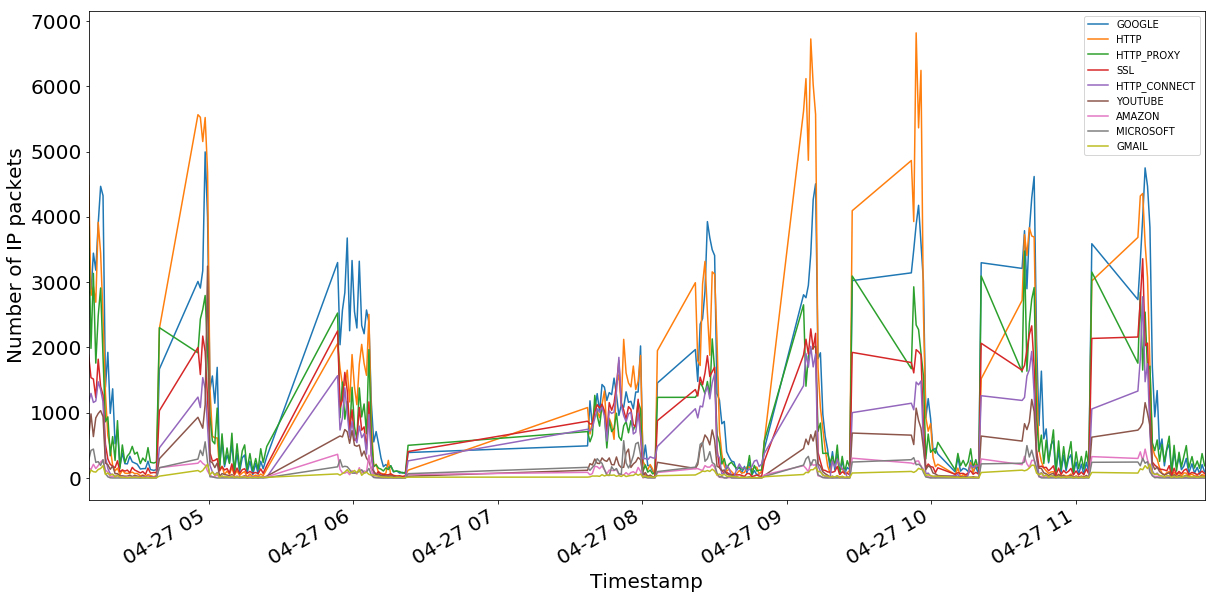

In [16]:
ax = new_df.plot(y = ['GOOGLE','HTTP','HTTP_PROXY','SSL','HTTP_CONNECT','YOUTUBE','AMAZON','MICROSOFT','GMAIL'], figsize=(20,10), fontsize=20)
ax.set_xlabel("Timestamp", fontsize=20)
ax.set_ylabel("Number of IP packets", fontsize=20)
fig = ax.get_figure()
fig.savefig('../../Documents/Thesis/Pictures/Dataset/KaggleSetPlotTop9Apps.pdf')